In [2]:
#Import relevant libraries and define the Data path
import pandas as pd
import matplotlib.pyplot as plt
import glob

DATA_PATH = '../data/DayAheadPrices_12.1.D/*.csv'

#Use Glob to get all CSV files for NO2
files = glob.glob(DATA_PATH)

no2_dataframes = []
for f in files:
    #Read each CSV file with the correct Delimiter, in this case tab
    csv = pd.read_csv(f, delimiter = '\t') 
    #Filter the rows where the mapcode is NO2 (Our relevant norwegian price zone)
    csv = csv[csv['MapCode'] == 'NO2']
    #Select only relevant columns
    csv = csv[['DateTime', 'Price']]
    csv.rename(columns = {'DateTime' : 'Date', 'Price' : 'Price'}, inplace = True)
    #Append this to the list of dataframes
    no2_dataframes.append(csv)

#Concatenate all NO2 data into a single dataframe
no2_data = pd.concat(no2_dataframes, ignore_index = True)
#Making sure the date column is in the right date format
no2_data['Date'] = pd.to_datetime(no2_data['Date'])
#To check that the output is right, compare result from tail to actual csv files
no2_data.tail()



,Date,Price
43819,2023-12-31 10:00:00,63.01
43820,2023-12-31 14:00:00,63.53
43821,2023-12-31 18:00:00,62.88
43822,2023-12-31 22:00:00,59.31
43823,2023-12-31 23:00:00,53.79


In [3]:
#Doing the same procedure for collecting relevant German data
ger_dataframes = []
for f in files:
    csv = pd.read_csv(f, delimiter = '\t') 
    csv = csv[csv['MapCode'] == 'DE_LU']
    csv = csv[['DateTime', 'Price']]
    csv.rename(columns = {'DateTime' : 'Date', 'Price' : 'Price'}, inplace = True)
    
    ger_dataframes.append(csv)


ger_data = pd.concat(ger_dataframes, ignore_index = True)
ger_data['Date'] = pd.to_datetime(ger_data['Date'])

ger_data.tail()


,Date,Price
116875,2023-12-30 18:15:00,73.52
116876,2023-12-30 19:15:00,60.56
116877,2023-12-30 20:15:00,59.63
116878,2023-12-30 21:15:00,47.55
116879,2023-12-30 22:15:00,47.47


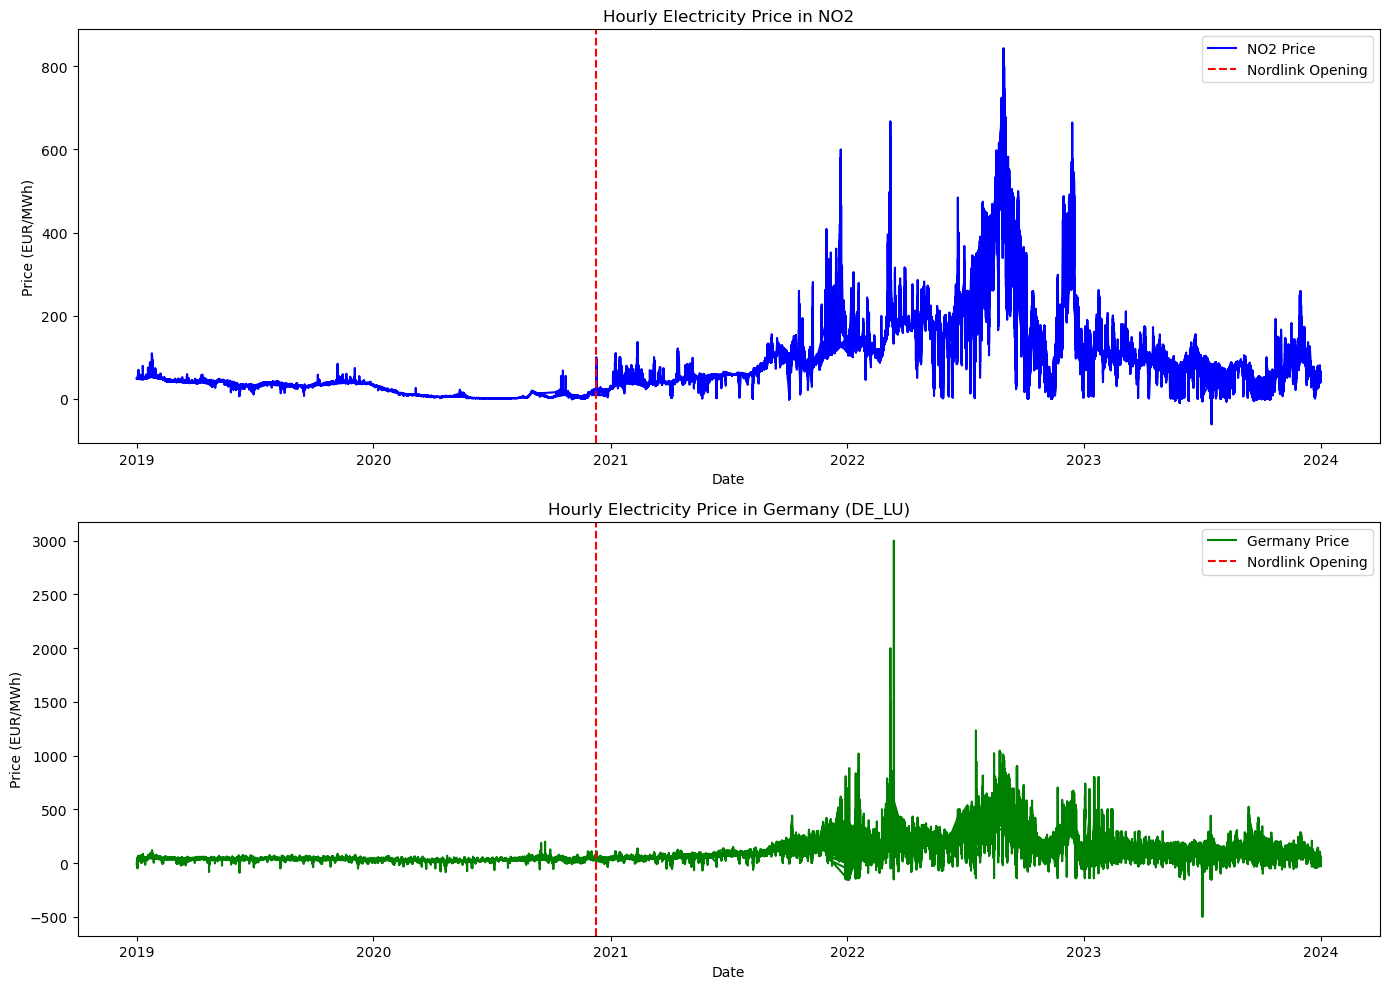

In [4]:

#Merge data on Date to ensure alignment (optional if already aligned)
#merged_data = pd.merge(no2_data, ger_data, on='Date', suffixes=('_NO2', '_DE_LU'))

# Plotting
plt.figure(figsize=(14, 10))

# NO2 Price subplot
plt.subplot(2, 1, 1)
# Making date as the x axis and price as the y axis, as well as coloring and labelling
plt.plot(no2_data['Date'], no2_data['Price'], color='blue', label='NO2 Price')
# Creating the line for when Nordlink was opened.
plt.axvline(pd.Timestamp('2020-12-09'), color='red', linestyle='--', label='Nordlink Opening')
#Creating titles and labels for the axis'
plt.title('Hourly Electricity Price in NO2')
plt.xlabel('Date')
plt.ylabel('Price (EUR/MWh)')
plt.legend()

#Germany price subplot, doing same procedure as above
plt.subplot(2, 1, 2)
plt.plot(ger_data['Date'], ger_data['Price'], color='green', label='Germany Price')
plt.axvline(pd.Timestamp('2020-12-09'), color='red', linestyle='--', label='Nordlink Opening')
plt.title('Hourly Electricity Price in Germany (DE_LU)')
plt.xlabel('Date')
plt.ylabel('Price (EUR/MWh)')
plt.legend()

#Making the graphs more easy to read and removes overlap
plt.tight_layout()
plt.savefig('figure_task1.png')
plt.show()



Conclusion: 

After analyzing electricity prices in NO2 and Germany, we observe overall increased price alignment following the opening of Nordlink, December 9, 2020, which is a result of improved cross-border balancing of energy. Electricity prices varied independently prior to Nordlink, however, these prices seem more synchronized after the opening, meaning that this cable has facilitated for more supply and demand adjustments. Despite all of this, as the subplots show, both countries are experiencing price spikes, which is highly likely due to the recent European energy crisis. The countries experienced most variation in the same timeframe, which also underscores the fact that prices became increasinly similar after Nordlink's deployment. 
The prices in NO2 have increased after the opening of Nordlink, and we can see a stable (or even slightly decrease) electricity price in Germany. This may be a result of greater exposure to European prices for Norway (E.G. fuel prices), while Germany has benefited from a stabilizing effect that has helped them contain their prices. 

Negative electricity prices can occur when a country has an oversupply of electricity during periods with low demand. This situation is often made worse by subsidies or rules that encourage renewable energy producers to keep generating power even when demand is low, since stopping and restarting production can be costly and inefficient. 